<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-1%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리 <br>
트리 모델 하나로는 좋은 성능을 도출하기는 제한이 있으나, 앙상블로 같이 여러개를 사용하면 앙상블 모델이 너무 좋은 성능을 나타낼 수 있어서 각광을 받고 있음.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [59]:
# 분석용 데이터 입력
stock_name = 'sec'
directory_for_ml = '../data/data_for_ml/'
fname = f'df_{stock_name}_sel.pkl'
f_name = directory_for_ml + fname
df = pd.read_pickle(f_name)

In [60]:
data = df.iloc[:, :-5]
target = df.iloc[:, -4]

In [6]:
data

,retail,foreigner,institution,financial,invtrust,pension,privequity,bank,insurance,financeetc,...,bond_usa_10_cr,bond_usa_2_cr,bond_usa_3m_cr,kosdaq_cr,kospi_cr,krw_cr,sox_cr,vix_cr,wti_cr,weekday
2022-01-12,-0.301171,0.655855,-0.598559,-1.635066,-0.866922,-0.344591,15.133333,1.000000,-0.701801,1.625000,...,0.31,3.87,-3.94,2.21,1.54,-0.54,0.66,-4.29,1.75,1.0
2022-01-13,-2.060312,-0.265567,-4.015761,12.581059,-1.083067,-1.672140,2.352617,-1.119863,-10.187919,1.857143,...,-2.92,-3.03,0.00,-0.82,-0.35,0.02,-2.29,15.27,-0.63,2.0
2022-01-14,-0.777487,0.465750,-0.408941,-0.746129,-5.538462,-0.109941,-1.838948,-1.000000,-0.716094,-1.000000,...,5.43,8.27,5.74,-1.21,-1.36,0.33,2.33,-5.51,2.07,3.0
2022-01-18,0.780319,0.115658,2.761050,-1.259777,3.559902,-2.097589,4.482343,-1.000000,-1.840336,3.823529,...,3.67,4.30,1.79,-1.46,-0.89,0.23,-4.44,18.76,2.08,0.0
2022-01-19,0.167478,0.321340,0.361733,-3.462559,2.925469,-3.572086,0.706991,-0.232143,-0.214444,-1.000000,...,-1.14,0.43,21.13,-1.06,-0.77,-0.38,-3.09,4.65,1.79,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,1.268305,5.320436,0.554077,1.711502,-0.736025,0.829847,-0.835642,-0.529412,0.577320,-1.003236,...,-0.94,0.13,0.08,0.61,0.89,-0.37,3.33,-5.16,1.95,2.0
2023-02-24,-0.566873,-0.036127,-1.085101,-1.322847,-0.872941,-0.982391,4.146067,-1.000000,-0.003268,-1.000000,...,1.46,2.34,0.02,-0.56,-0.63,1.28,-1.80,2.51,1.23,3.0
2023-02-27,-0.042457,-0.097325,-1.689030,-1.354015,-3.740741,-17.701754,0.110262,1.000000,-1.108197,1.000000,...,-0.34,-0.52,-0.65,0.18,-0.87,0.22,0.55,-3.32,-1.27,4.0
2023-02-28,0.754292,-0.248439,12.372368,5.353608,3.135135,-4.090336,0.712881,1.796610,-3.500000,35.000000,...,0.15,0.74,1.10,1.45,0.42,0.43,0.24,-1.19,1.81,0.0


In [ ]:
target = df.iloc[:, -4]
plt_title2 = 'close_cr_5'

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 189 entries, 2022-01-12 to 2023-03-02
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   retail          189 non-null    float64
 1   foreigner       189 non-null    float64
 2   institution     189 non-null    float64
 3   financial       189 non-null    float64
 4   invtrust        189 non-null    float64
 5   pension         189 non-null    float64
 6   privequity      189 non-null    float64
 7   bank            189 non-null    float64
 8   insurance       189 non-null    float64
 9   financeetc      189 non-null    float64
 10  corporateetc    189 non-null    float64
 11  foreigneretc    189 non-null    float64
 12  open            189 non-null    float64
 13  high            189 non-null    float64
 14  low             189 non-null    float64
 15  close           189 non-null    float64
 16  vol             189 non-null    float64
 17  dji_cr          

In [4]:
wine.describe(include='all')

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
train = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].values

In [61]:
train_input, test_input, train_target, test_target = train_test_split(data, target, random_state=42, test_size=0.2, stratify=target)

In [62]:
print(train_input.shape, test_input.shape)

(214, 36) (54, 36)


### 결정 트리는 스케일을 조정할 필요가 없음 <br>
선형함수를 훈련하는 알고리즘이 아니기 때문에 가중치를 계산하지 않고 진행해도 됨.

In [63]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [64]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [65]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [66]:
train_score = lr.score(train_scaled, train_target)
test_score = lr.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.8598130841121495 
 test score: 0.7962962962962963


### 설명하기 쉬운 모델과 어려운 모델

In [67]:
lr.coef_, lr.intercept_

(array([[-0.3190515 ,  0.08646415, -0.61946123, -0.15244368, -0.11099198,
          0.3453362 , -0.27578217, -0.45724674, -0.10470544,  0.0305129 ,
          0.21137693,  0.24093496, -0.54342739, -0.09801815,  0.4261272 ,
         -0.03870434, -0.16214059, -0.58778461, -0.29913308, -0.1236613 ,
          0.5065861 , -0.07128711,  0.43847544,  0.05718924, -0.26193024,
          0.08926318, -0.04053401, -0.26285918,  0.30151773, -0.16466059,
          2.5680533 , -0.35709877,  0.38219257,  0.20116306,  0.01919137,
          0.21827223]]),
 array([-0.52762474]))

## 결정 트리 <br>
트리를 구분하는 기준은 gini 계수로 하고 있음

In [68]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [69]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 1.0 
 test score: 0.7222222222222222


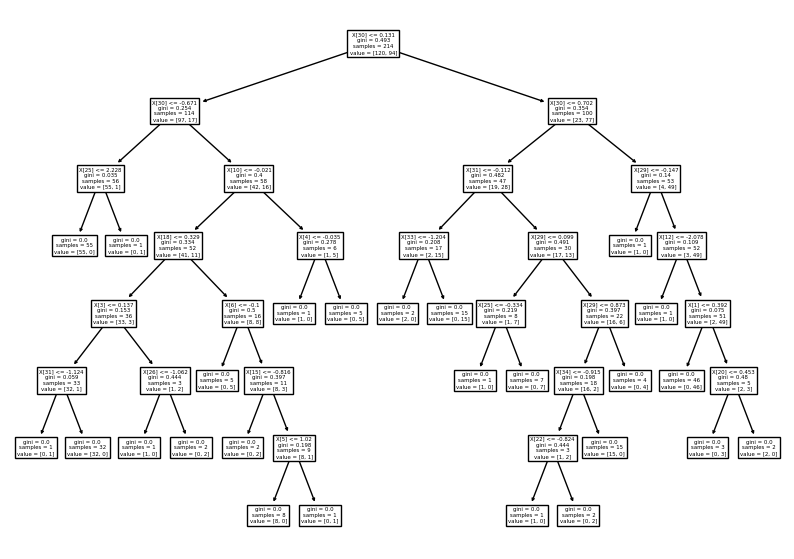

In [70]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show() # colab, notebook에서는 plt.show없이도 가능하나 그림 그리기 전의 데이터 print를 보이지 않게 함.

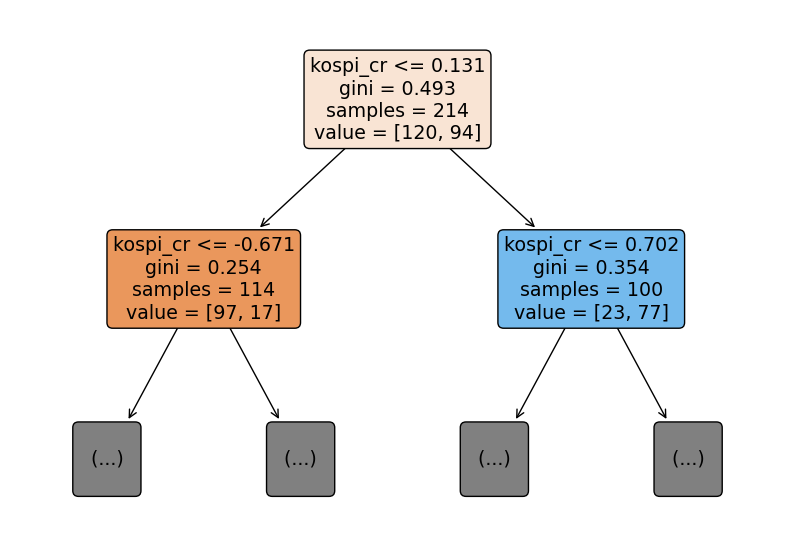

In [71]:
classes = data.columns
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, rounded=True, feature_names=classes)
plt.show()

In [72]:
classes = data.columns
classes

Index(['retail', 'foreigner', 'institution', 'financial', 'invtrust',
       'pension', 'privequity', 'bank', 'insurance', 'financeetc',
       'corporateetc', 'foreigneretc', 'open', 'high', 'low', 'close', 'vol',
       'dji_cr', 'dji_f_cr', 'ixic_cr', 'ixic_f_cr', 'spx_cr', 'spx_f_cr',
       'bond_kor_10_cr', 'bond_kor_2_cr', 'dxy_cr', 'bond_usa_10_cr',
       'bond_usa_2_cr', 'bond_usa_3m_cr', 'kosdaq_cr', 'kospi_cr', 'krw_cr',
       'sox_cr', 'vix_cr', 'wti_cr', 'weekday'],
      dtype='object')

### 가지치기 <br>
대표적인 과대적합 방지 방법 in  결정트리 방법 <br>
가중치를 학습하는 방법이 아니기 때문에 L1, L2 규제 등을 적용할 수 없음.

In [73]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [74]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.8598130841121495 
 test score: 0.7592592592592593


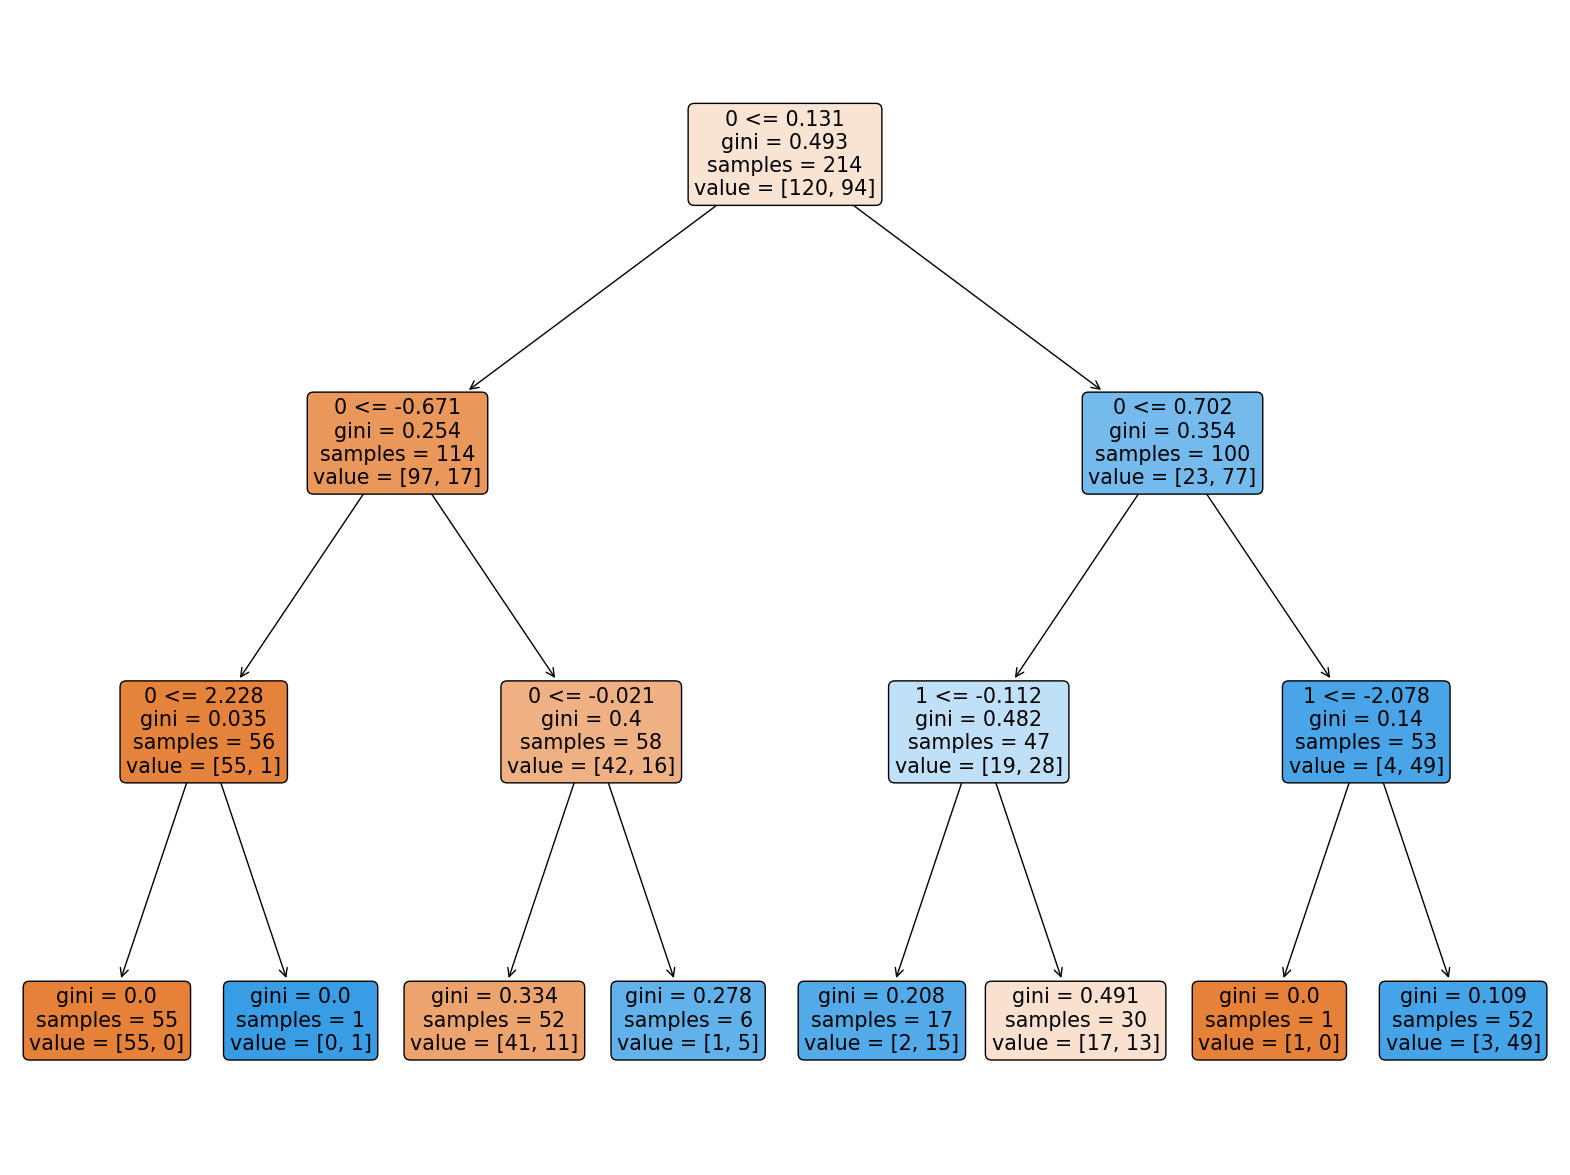

In [77]:
classes = target
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, rounded=True, feature_names=classes)
plt.show()

위 그림에서 설탕 당도가 음수로 표시된 이유는 표준화 과정을 거쳤기 때문에 나타나는 현상으로 표준화 과정을 거치지 않으면 더 설명하기가 좋을 것임.

## 전처리 없이 수행

In [78]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [79]:
train_score = dt.score(train_input, train_target)
test_score = dt.score(test_input, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.8598130841121495 
 test score: 0.7592592592592593


표준화한 후의 결과와 동일함.

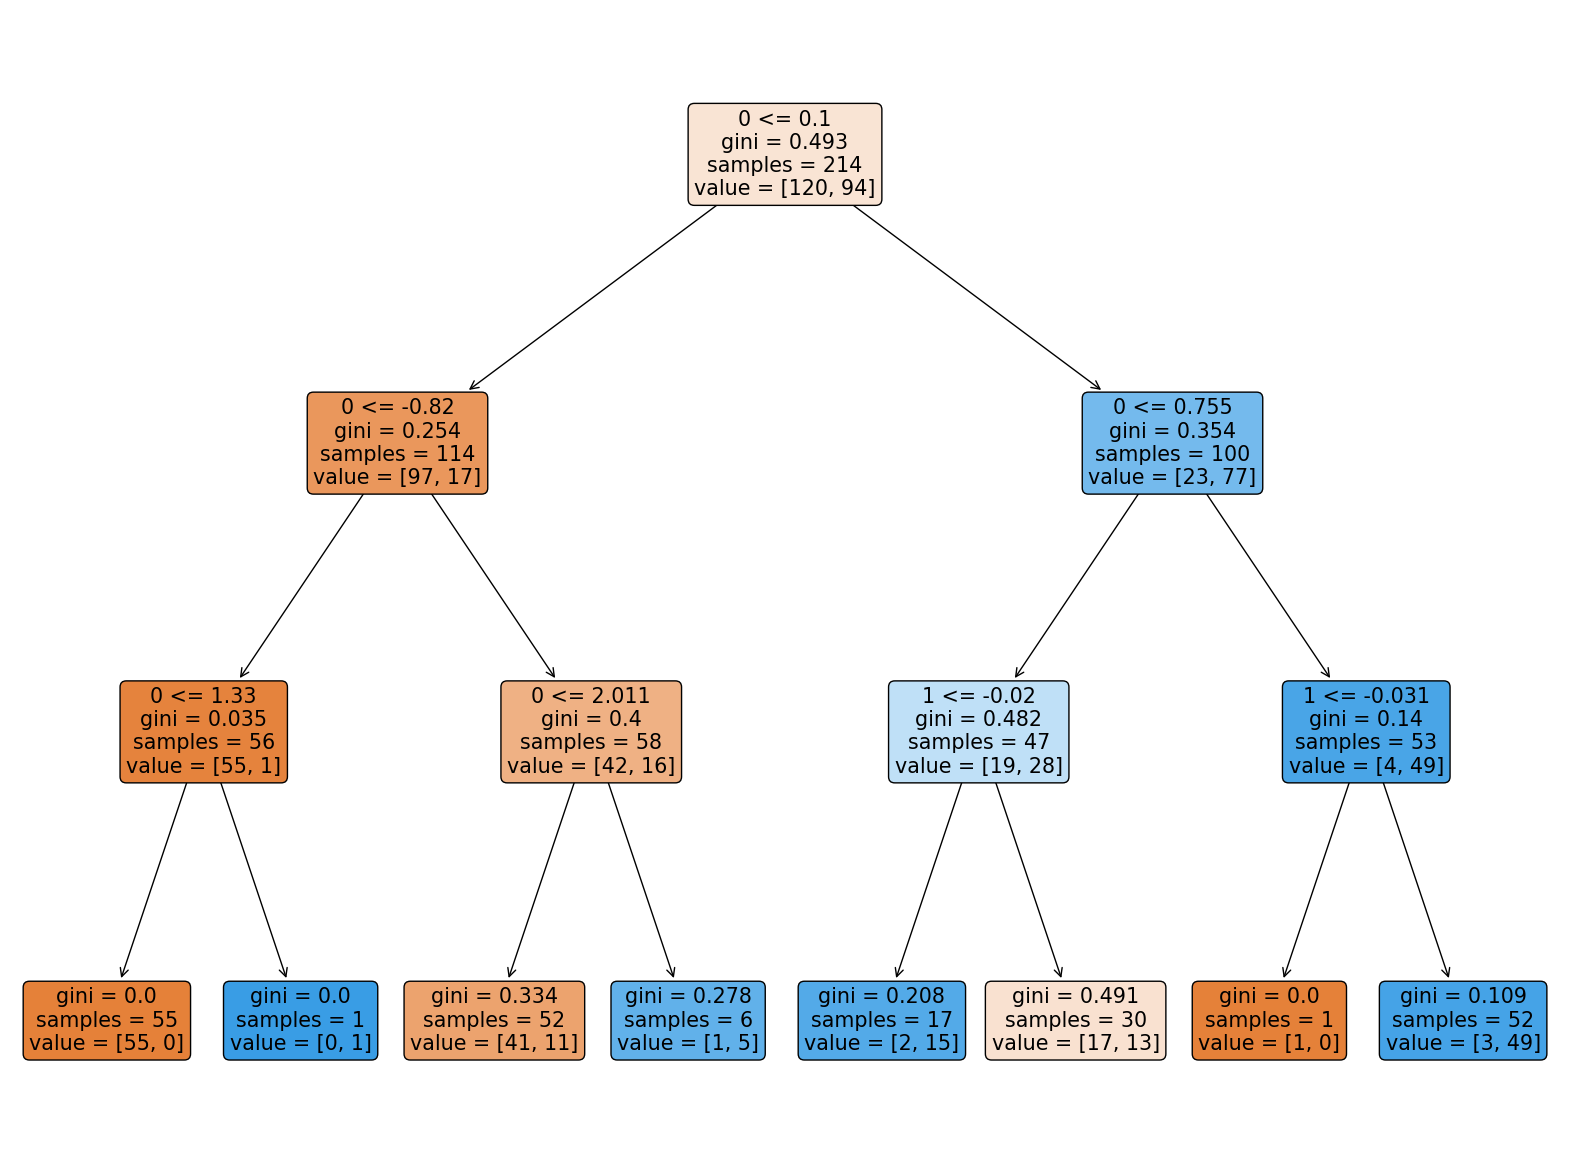

In [80]:
classes = target
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, rounded=True, feature_names=classes)
plt.show()

설탕 농도 표시에서 음수가 보이지 않음.

In [81]:
print(dt.feature_importances_) # 두번째 설탕이 중요도가 가장 높음. 트리 기반의 모델에서 제공함.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.06656292 0.
 0.02788203 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03143302 0.         0.         0.         0.
 0.80410327 0.07001876 0.         0.         0.         0.        ]


In [82]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06656292, 0.        , 0.02788203, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03143302, 0.        , 0.        , 0.        , 0.        ,
       0.80410327, 0.07001876, 0.        , 0.        , 0.        ,
       0.        ])

In [83]:
df_sel = pd.DataFrame(dt.feature_importances_, index=data.columns, columns=['value']).sort_values(by='value', ascending=False)

In [85]:
df_sel

,value
kospi_cr,0.804103
krw_cr,0.070019
corporateetc,0.066563
dxy_cr,0.031433
open,0.027882
retail,0.000000
bond_usa_10_cr,0.000000
spx_cr,0.000000
spx_f_cr,0.000000
bond_kor_10_cr,0.000000


In [84]:
df_sel.index[:10]

Index(['kospi_cr', 'krw_cr', 'corporateetc', 'dxy_cr', 'open', 'retail',
       'bond_usa_10_cr', 'spx_cr', 'spx_f_cr', 'bond_kor_10_cr'],
      dtype='object')

## 확인문제

In [45]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

1.0
0.5


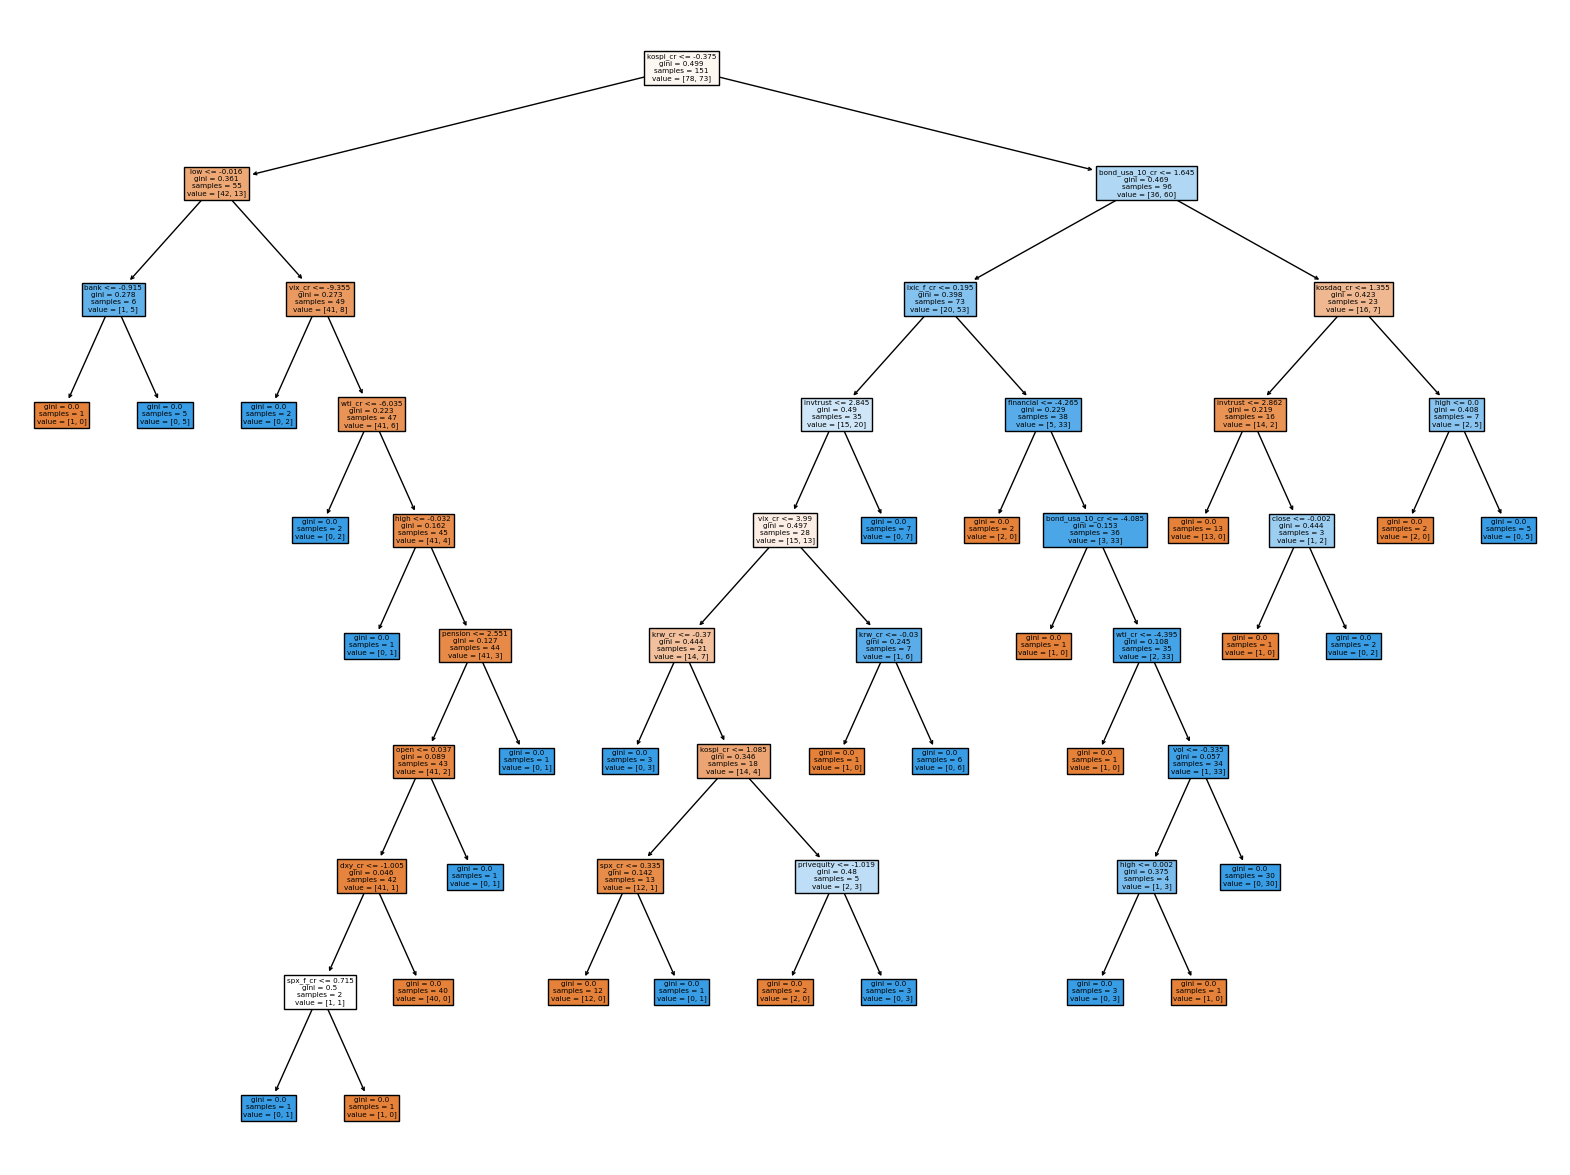

In [46]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=data.columns)
plt.show()

In [47]:
pd.DataFrame(dt.feature_importances_, index=data.columns, columns=['value']).sort_values(by='value', ascending=False)

,value
kospi_cr,0.166258
bond_usa_10_cr,0.105392
high,0.080288
vix_cr,0.076914
invtrust,0.071349
wti_cr,0.066423
krw_cr,0.063983
low,0.063648
kosdaq_cr,0.044844
ixic_f_cr,0.042617
